In [ ]:
!unzip /content/SEMINAR.zip

Archive:  /content/SEMINAR.zip
   creating: SEMINAR/
  inflating: SEMINAR/app.py          
  inflating: SEMINAR/keypoint_classification.ipynb  
  inflating: SEMINAR/keypoint_classification_EN.ipynb  
  inflating: SEMINAR/LICENSE         
   creating: SEMINAR/model/
   creating: SEMINAR/model/keypoint_classifier/
  inflating: SEMINAR/model/keypoint_classifier/keypoint.csv  
  inflating: SEMINAR/model/keypoint_classifier/keypoint_classifier.hdf5  
  inflating: SEMINAR/model/keypoint_classifier/keypoint_classifier.py  
  inflating: SEMINAR/model/keypoint_classifier/keypoint_classifier.tflite  
  inflating: SEMINAR/model/keypoint_classifier/keypoint_classifier_label.csv  
   creating: SEMINAR/model/keypoint_classifier/__pycache__/
  inflating: SEMINAR/model/keypoint_classifier/__pycache__/keypoint_classifier.cpython-312.pyc  
   creating: SEMINAR/model/point_history_classifier/
  inflating: SEMINAR/model/point_history_classifier/point_history.csv  
  inflating: SEMINAR/model/point_history_

In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [ ]:
dataset = '/content/SEMINAR/model/keypoint_classifier/keypoint.csv'
model_save_path = '/content/SEMINAR/model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = '/content/SEMINAR/model/keypoint_classifier/keypoint_classifier.tflite'

In [ ]:
NUM_CLASSES = 5

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path,
    verbose=1,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

# Early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(
    patience=100,
    verbose=1,
    monitor='val_loss',
    mode='min',
    restore_best_weights=True
)


In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
21/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1084 - loss: 1.7975
Epoch 1: val_loss improved from inf to 1.57143, saving model to /content/SEMINAR/model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1138 - loss: 1.7742 - val_accuracy: 0.2785 - val_loss: 1.5714
Epoch 2/1000
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2200 - loss: 1.6056  
Epoch 2: val_loss improved from 1.57143 to 1.50401, saving model to /content/SEMINAR/model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2251 - loss: 1.6032 - val_accuracy: 0.4308 - val_loss: 1.5040
Epoch 3/1000
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3433 - loss: 1.5217  
Epoch 3: val_loss improved from 1.50401 to 1.42328, saving model to /content/SEMINAR/model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3432 - loss: 1.5186 - val_accuracy: 0.4629 - va

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9592 - loss: 0.2757 


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[9.3172729e-01 1.0161888e-02 1.1478662e-08 5.7996441e-02 1.1437293e-04]
0


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


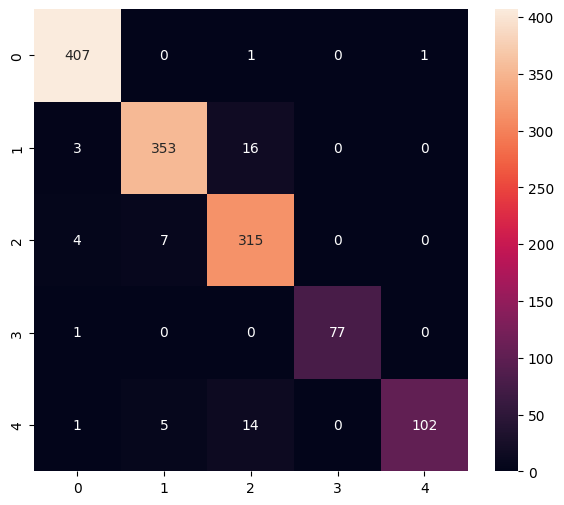

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       409
           1       0.97      0.95      0.96       372
           2       0.91      0.97      0.94       326
           3       1.00      0.99      0.99        78
           4       0.99      0.84      0.91       122

    accuracy                           0.96      1307
   macro avg       0.97      0.95      0.96      1307
weighted avg       0.96      0.96      0.96      1307



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Saved artifact at '/tmp/tmpeuiromkq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140639941290192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140639943666400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140639943543616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140639943550656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140639943546080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140639943549248: TensorSpec(shape=(), dtype=tf.resource, name=None)


6600

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))


In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 1.35 ms, sys: 0 ns, total: 1.35 ms
Wall time: 1.42 ms


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.31727290e-01 1.01618879e-02 1.14786385e-08 5.79964705e-02
 1.14372931e-04]
0
